In [ ]:
import pandas as pd
import numpy as np
import os
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path1 = '/content/drive/My Drive/Data/globalterrorismdb_0522dist.xlsx'
df = pd.read_excel(path1)

In [ ]:
path2 = '/content/drive/My Drive/Data/globalterrorismdb_2021Jan-June_1222dist.xlsx'
df2 = pd.read_excel(path2)

In [ ]:
filter = df.loc[df.gname=='Boko Haram']
filter

eventid  iyear  imonth  iday approxdate  extended resolution  \
92970   200907270015   2009       7    27        NaN         0        NaT   
92971   200907270016   2009       7    27        NaN         0        NaT   
92972   200907270017   2009       7    27        NaN         0        NaT   
92976   200907270025   2009       7    27        NaN         0        NaT   
92977   200907270026   2009       7    27        NaN         0        NaT   
...              ...    ...     ...   ...        ...       ...        ...   
209586  202012260015   2020      12    26        NaN         0        NaT   
209643  202012280023   2020      12    28        NaN         0        NaT   
209661  202012290023   2020      12    29        NaN         0        NaT   
209663  202012290025   2020      12    29        NaN         0        NaT   
209664  202012290026   2020      12    29        NaN         0        NaT   

        country country_txt  region  ...  \
92970       147     Nigeria      11  ...   
92971       147     Nigeria      11  ...   
92972       147     Nigeria      11  ...   
92976       147     Nigeria      11  ...   
92977       147     Nigeria      11  ...   
...         ...         ...     ...  ...   
209586      147     Nigeria      11  ...   
209643      147     Nigeria      11  ...   
209661      147     Nigeria      11  ...   
209663      147     Nigeria      11  ...   
209664      147     Nigeria      11  ...   

                                                 addnotes  \
92970                                                 NaN   
92971   This was one of four related attacks (cf. 2009...   
92972   This was one of three related attacks (cf. 200...   
92976   This is one of three related attacks (cf. 2009...   
92977   This was one of three related attacks (cf. 200...   
...                                                   ...   
209586  Casualties represent a division of the total n...   
209643  Casualties conflict across sources. Following ...   
209661                                                NaN   
209663                                                NaN   
209664                                                NaN   

                                                   scite1  \
92970   Ibrahim Mshelizza, "Hundreds Of Bodies in Stre...   
92971   Ibrahim Mshelizza, "Hundreds Of Bodies in Stre...   
92972   Ibrahim Mshelizza, "Hundreds Of Bodies in Stre...   
92976   Ibrahim Mshelizza, "Hundreds Of Bodies in Stre...   
92977   Ibrahim Mshelizza, "Hundreds Of Bodies in Stre...   
...                                                   ...   
209586  "10 Dead Bodies Counted Following Boko Haram’s...   
209643  "Landmines kill 3 soldiers, wounded others in ...   
209661  "Troops ‘kill 3’ Boko Haram insurgents in Born...   
209663  "Buhari meets Zulum as explosion kills 11 secu...   
209664  "Buhari meets Zulum as explosion kills 11 secu...   

                                                   scite2  \
92970   Press TV, "Fierce Clashes Continue in Nigeria,...   
92971   Press TV, "Fierce Clashes Continue in Nigeria,...   
92972   Press TV, "Fierce Clashes Continue in Nigeria,...   
92976   Press TV, "Fierce Clashes Continue in Nigeria,...   
92977   Press TV, "Fierce Clashes Continue in Nigeria,...   
...                                                   ...   
209586  "Residents Flee As Boko Haram Attacks Four Vil...   
209643  "Nigeria / Eleven, including four soldiers, ki...   
209661  "Several Terrorists Killed In Borno Army Ambus...   
209663  "Landmine kills 9 Nigerian security personnel,...   
209664  "Landmine kills 9 Nigerian security personnel,...   

                                                   scite3  \
92970   Jane's Intelligence, "Islamist Militants Attac...   
92971   Jane's Intelligence, "Islamist Militants Attac...   
92972   Jane's Intelligence, "Islamist Militants Attac...   
92976   Jane's Intelligence, "Islamist Militants Attac...   
92977   Jane's Intelligence, "Islamist Militants Attac.

In [ ]:
filter = df.loc[df.gname=='Black Nationalists'].sort_values(by='iyear')

In [ ]:
filter.country_txt.unique()

array(['United States', 'Rhodesia', 'South Africa'], dtype=object)

In [ ]:
filter.loc[df.country_txt=='Afghanistan'].latitude

Series([], Name: latitude, dtype: float64)

In [ ]:
filter.loc[df.country_txt=='Afghanistan'].longitude

Series([], Name: longitude, dtype: float64)

In [ ]:
print(df.shape, df2.shape)

(209706, 135) (4960, 135)


In [ ]:
merged = pd.concat([df, df2])
merged.shape

(214666, 135)

In [ ]:
print(merged.head().eventid,'\n', merged.tail().eventid)

0    197000000001
1    197000000002
2    197001000001
3    197001000002
4    197001000003
Name: eventid, dtype: int64 
 4955    202106300023
4956    202106300029
4957    202106300030
4958    202106300038
4959    202107020037
Name: eventid, dtype: int64


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime

import geopandas as gpd
from branca.colormap import LinearColormap

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df.weaptype1_txt.unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [ ]:
df.loc[df['weaptype1_txt'].str.contains('Vehicle')].weaptype1_txt

585       Vehicle (not to include vehicle-borne explosiv...
8688      Vehicle (not to include vehicle-borne explosiv...
22162     Vehicle (not to include vehicle-borne explosiv...
22665     Vehicle (not to include vehicle-borne explosiv...
23196     Vehicle (not to include vehicle-borne explosiv...
                                ...                        
205243    Vehicle (not to include vehicle-borne explosiv...
205499    Vehicle (not to include vehicle-borne explosiv...
205959    Vehicle (not to include vehicle-borne explosiv...
206553    Vehicle (not to include vehicle-borne explosiv...
208937    Vehicle (not to include vehicle-borne explosiv...
Name: weaptype1_txt, Length: 186, dtype: object

In [ ]:
df['weaptype1_txt'] = df['weaptype1_txt'].apply(lambda x: x.split()[0] if 'Vehicle' in x.split() else x)

In [ ]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
world_geo = f'{url}/world-countries.json'
json_data = gpd.read_file(f'{url}/world-countries.json')
json_data[:5]

id                  name  \
0  AFG           Afghanistan   
1  AGO                Angola   
2  ALB               Albania   
3  ARE  United Arab Emirates   
4  ARG             Argentina   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...  
2  POLYGON ((20.59025 41.85540, 20.46317 41.51509...  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...

In [ ]:
country_data = df.groupby(by=['country_txt'],as_index=False).count().sort_values(by='eventid', ascending=False).iloc[:, :2]
nkill_data = df.groupby(by=['country_txt'], as_index=False).sum().sort_values(by='eventid', ascending=False).loc[:,  ['country_txt', 'nkill']]

temp_global = json_data.merge(country_data, left_on='name', right_on='country_txt', how='left').fillna(0)
global_data = temp_global.merge(nkill_data, left_on='name', right_on='country_txt', how='left').fillna(0)

In [ ]:
def style_function(feature):
    """
    Customize maps
    """
    return {
        'fillColor': '#ffaf00',
        'color': 'grey',
        'weight': 1.5,
        'dashArray': '5, 5'
    }

def highlight_function(feature):
    """
    Customize maps
    """
    return {
        'fillColor': '#ffaf00',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }

def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors

    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    """
    This function plots data setting up frequency and percentage in a count plot;
    This also sets up borders and personalization.

    Input:
        The feature to be counted and the dataframe. Other args are optional.
    Returns:
        Count plot.
    """
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax,
                           order=df[feature].value_counts().index)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax,
                           order=df[feature].value_counts().index)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    frame1 = plt.gca()
    frame1.axes.get_yaxis().set_ticks([])

    # Setting up borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text

    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Counting plot', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Counting plot by ' + hue, size=13, pad=15)
    if title != '':
        ax.set_title(title)
    plt.tight_layout()

def country_analysis(country_name, data, palette, colors_plot2, color_lineplot):
    """
    This function creates a dashboard with informations of terrorism in a certain country.
    Input:
        The function receives the name of the country, the dataset and color configuration
    Output:
        It returns a 4 plot dashboard.
    """
    # Preparing
    country = data.query('country_txt == @country_name')
    if len(country) == 0:
        print('Country did not exists in dataset')
        return
    country_cities = country.groupby(by='city', as_index=False).count().sort_values('eventid',
                                                                                   ascending=False).iloc[:5, :2]
    suicide_size = country['suicide'].sum() / len(country)
    labels = ['Suicide', 'Not Suicide']
    colors = colors_plot2

    country_year = country.groupby(by='iyear', as_index=False).sum().loc[:, ['iyear', 'nkill']]
    country_weapon = country.groupby(by='weaptype1_txt', as_index=False).count().sort_values(by='eventid',
                                                                                             ascending=False).iloc[:,
                                                                                                                   :2]
    # Dashboard
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Plot 1 - Top 5 terrorism cities
    sns.barplot(x='eventid', y='city', data=country_cities, ci=None, palette=palette, ax=axs[0, 0])
    format_spines(axs[0, 0], right_border=False)
    axs[0, 0].set_title(f'Top 5 {country_name} Cities With Most Terrorism Occurences')
    """for p in axs[0, 0].patches:
        width = p.get_width()
        axs[0, 0].text(width-290, p.get_y() + p.get_height() / 2. + 0.10, '{}'.format(int(width)),
                ha="center", color='white')"""
    axs[0, 0].set_ylabel('City')
    axs[0, 0].set_xlabel('Victims')

    # Plot 2 - Suicide Rate
    center_circle = plt.Circle((0,0), 0.75, color='white')
    axs[0, 1].pie((suicide_size, 1-suicide_size), labels=labels, colors=colors_plot2, autopct='%1.1f%%')
    axs[0, 1].add_artist(center_circle)
    format_spines(axs[0, 1], right_border=False)
    axs[0, 1].set_title(f'{country_name} Terrorism Suicide Rate')
    axs[0, 0].set_ylabel('Victims')

    # Plot 3 - Victims through the years
    sns.lineplot(x='iyear', y='nkill', data=country_year, ax=axs[1, 0], color=color_lineplot)
    format_spines(axs[1, 0], right_border=False)
    axs[1, 0].set_xlim([1970, 2017])
    axs[1, 0].set_title(f'{country_name} Number of Victims Over Time')
    axs[1, 0].set_ylabel('Victims')

    # Plot 4 - Terrorism Weapons
    sns.barplot(x='weaptype1_txt', y='eventid', data=country_weapon, ci=None, palette=palette, ax=axs[1, 1])
    axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
    axs[1, 1].set_xlabel('')
    axs[1, 1].set_ylabel('Count')
    format_spines(axs[1, 1], right_border=False)
    axs[1, 1].set_title(f'{country_name} Weapons Used in Attacks')

    plt.suptitle(f'Terrorism Analysis in {country_name} between 1970 and 2017', size=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

In [ ]:
m = folium.Map(
    location=[0, 0],
    zoom_start=1.50,
    tiles='openstreetmap'
)

folium.Choropleth(
    geo_data=json_data,
    name='Ataques Terroristas',
    data=country_data,
    columns=['country_txt', 'eventid'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='white',
    nan_fill_opacity=0.9,
    legend_name='Terrorism Recorded 1970 - 2021',
    popup_function='Teste'
).add_to(m)

Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
).add_to(m)

folium.GeoJson(
    global_data,
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=folium.GeoJsonTooltip(fields=['name', 'eventid', 'nkill'],
                                  aliases=['Country:', 'Incidents:', 'Victims'],
                                  labels=True,
                                  sticky=True)
).add_to(m)

m.save('terrorism_incidents.html')
m

In [ ]:
heat_data = df.groupby(by=['latitude', 'longitude'],
                                 as_index=False).count().sort_values(by='eventid', ascending=False).iloc[:, :3]

m = folium.Map(
    location=[33.312805, 44.361488],
    zoom_start=2.5,
    tiles='Stamen Toner'
)

HeatMap(
    name='Mapa de Calor',
    data=heat_data,
    radius=10,
    max_zoom=13
).add_to(m)

Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
).add_to(m)

m.save('terrorism_density.html')
m

In [ ]:
year_list = []
for year in df['iyear'].sort_values().unique():
    data = df.query('iyear == @year')
    data = data.groupby(by=['latitude', 'longitude'],
                        as_index=False).count().sort_values(by='eventid', ascending=False).iloc[:, :3]
    year_list.append(data.values.tolist())

m = folium.Map(
    location=[0, 0],
    zoom_start=2.0,
    tiles='Stamen Toner'
)

HeatMapWithTime(
    name='Terrorism Heatmap',
    data=year_list,
    radius=9,
    index=list(df['iyear'].sort_values().unique())
).add_to(m)

m

In [ ]:
month_index = [
    'jan/2020',
    'feb/2020',
    'mar/2020',
    'apr/2020',
    'may/2020',
    'jun/2020',
    'jul/2020',
    'aug/2020',
    'sep/2020',
    'oct/2020',
    'nov/2020',
    'dec/2020'
]

month_list = []
for month in df.query('iyear==2020')['imonth'].sort_values().unique():
    data = df.query('imonth == @month')
    data = data.groupby(by=['latitude', 'longitude'],
                        as_index=False).sum().sort_values(by='imonth',
                                                          ascending=True).loc[:, ['latitude',
                                                                                   'longitude',
                                                                                   'nkill']]
    month_list.append(data.values.tolist())

m = folium.Map(
    location=[0, 0],
    zoom_start=1.5,
    tiles='Stamen Toner'
)

HeatMapWithTime(
    name='Mapa de Calor',
    data=month_list,
    radius=4,
    index=month_index
).add_to(m)

m

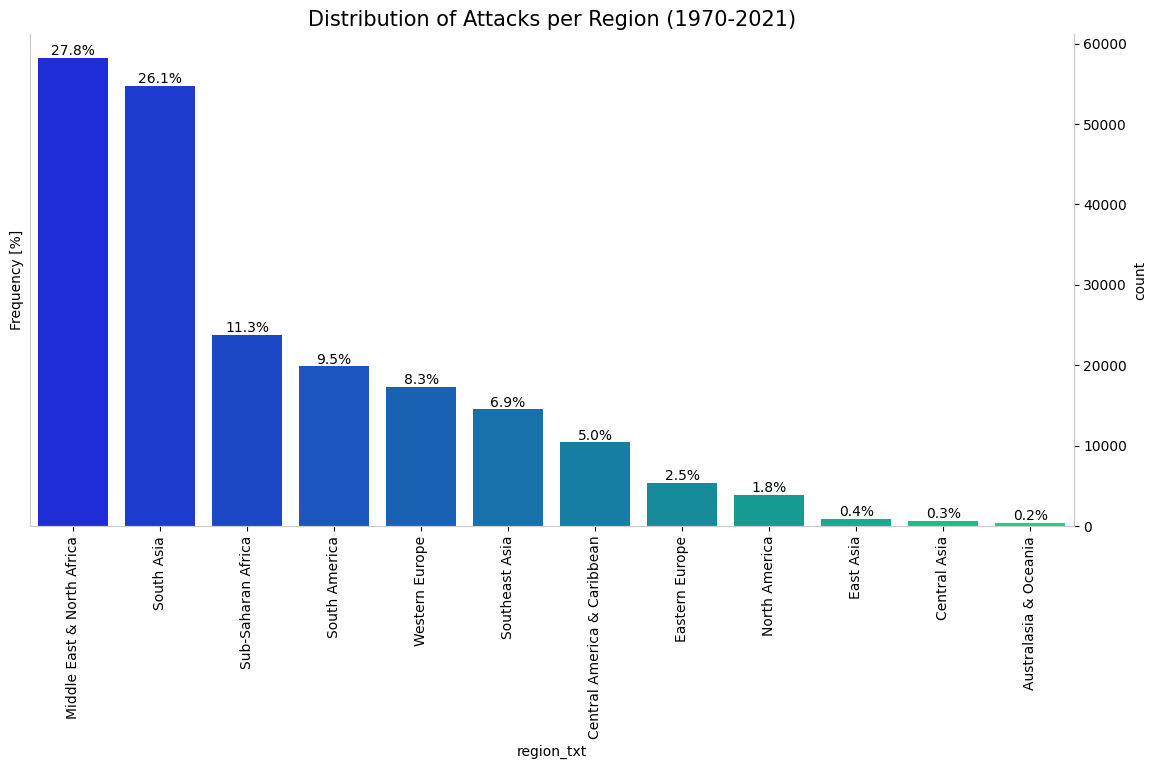

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
count_plot('region_txt', df, ax=ax, colors='winter')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Distribution of Attacks per Region (1970-2021)', size=15)
plt.show()

In [ ]:
df['summary'][:10]

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
5    1/1/1970: Unknown African American assailants ...
6                                                  NaN
7    1/2/1970: Unknown perpetrators detonated explo...
8    1/2/1970: Karl Armstrong, a member of the New ...
9    1/3/1970: Karl Armstrong, a member of the New ...
Name: summary, dtype: object

In [ ]:
t = df

In [ ]:
df = t

In [ ]:
df.summary.iloc[5]

'1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States. There were no casualties, however, one bullet narrowly missed several police officers. This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.'

In [ ]:
df = df.dropna(axis='index', how='any', subset='summary')

In [ ]:
df.summary

5         1/1/1970: Unknown African American assailants ...
7         1/2/1970: Unknown perpetrators detonated explo...
8         1/2/1970: Karl Armstrong, a member of the New ...
9         1/3/1970: Karl Armstrong, a member of the New ...
11        1/6/1970: Unknown perpetrators threw a Molotov...
                                ...                        
209701    12/31/2020: Assailants fired mortar shells tar...
209702    12/31/2020: Assailants attempted to plant expl...
209703    12/31/2020: Assailants set fire to German Army...
209704    12/31/2020: Assailants shot and killed a civil...
209705    12/31/2020: Assailants attacked a Volunteers o...
Name: summary, Length: 143586, dtype: object

In [ ]:
df.summary = df['summary'].apply(lambda x: x.split(': ')[-1]).values

In [ ]:
t.summary[:10]

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
5    1/1/1970: Unknown African American assailants ...
6                                                  NaN
7    1/2/1970: Unknown perpetrators detonated explo...
8    1/2/1970: Karl Armstrong, a member of the New ...
9    1/3/1970: Karl Armstrong, a member of the New ...
Name: summary, dtype: object

In [ ]:
corpus = df.summary
for c in corpus:
    urls = re.findall('(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', c)
    if len(urls) == 0:
        pass
    else:
        print(f'Description: {list(corpus).index(c)} - Links: {urls}')

Description: 6994 - Links: [('http', 'www.earthliberationfront.com', '/news/2002/020116ml.html')]


In [ ]:
# Replacing sites and hiperlinks
corpus_wo_hiperlinks = []
for c in corpus:
    c = re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', 'link', c)
    corpus_wo_hiperlinks.append(c)
corpus_wo_hiperlinks[6977]

'Armed men attacked a Tanzanian ship from Bujumbura near Nyanza-Lac in southwest Burundi, on Lake Tanganyika. Four people died in the attack. No group claimed responsibility for the attack.”'

In [ ]:
# Replacing numbers
corpus_wo_numbers = []
for c in corpus_wo_hiperlinks:
    c = re.sub('\d+(?:\.\d*(?:[eE]\d+))?', 'number', c)
    corpus_wo_numbers.append(c)
corpus_wo_numbers[399]

'At around number:number AM, a member of the Black Liberation Army flagged down a police officer driving his radio car in Manhattan, New York, United States. When the cop pulled over, the perpetrator began stabbing the officer with a knife. The officer then shot and killed the assailant. That morning, the New York Times received two anonymous calls stating that a New York policeman would be killed at number:number AM unless the BLA received $number,number.'

In [ ]:
# Replacing special characteres with whitespace
corpus_text = []
for c in corpus_wo_numbers:
    c = re.sub(r'\W', ' ', c)
    corpus_text.append(c)
corpus_text[1113]

'Members of the Evan Mecham Eco Terrorist International Conspiracy  EMETIC   claimed responsibility for damaging the pylons and cables which supported the main ski chairlift at the Fairfield Snow Bowl Ski Resort in Flagstaff  Arizona in the United States    There were no casualties  but the property damage was estimated at  number number and an additional  number number to heighten security at the resort  In a letter to the ski resort  the group stated that  if trees were not allowed to grow back  and  ski operations not discontinued   then more damage would occur  Marc Leslie Davis  Margaret Katherine Millet  Ilse Washington Asplund  and Marc Andre Baker were arrested and in number  pled guilty and sentenced for their involvement in this incident '

In [ ]:
# Removing additional whitespaces
#corpus_after_regex = []
#for c in corpus_text:
#    c = re.sub(r'\s+', ' ', c)
#    corpus_after_regex.append(c)

#corpus_after_regex[1113]

In [ ]:
cleaned_corpus = pd.Series(corpus_text).apply(lambda x: x.lower())
cleaned_corpus[990]

'the vietnamese organization to exterminate communists and restore the nation claimed responsibility for shooting nguyen van luy and his wife pham thi luu in front of their residence in san francisco  california  united states  van luy  a vocal defender of vietnam s communist government  was wounded and thi luu was killed '

In [ ]:
cleaned_corpus.index = df['summary'].index

In [ ]:
df['summary'] = cleaned_corpus

In [ ]:
df.to_csv('summary_modified.csv', index=False)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from geopy.geocoders import Nominatim

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1647360823046' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismDataAnalysis_16364770272310&#47;Dashboard1&#47;1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz'  style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
        <param name='embed_code_version' value='3' />
        <param name='site_root' value='' />
        <param name='name' value='TerrorismDataAnalysis_16364770272310&#47;Dashboard1' />
        <param name='tabs' value='yes' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismDataAnalysis_16364770272310&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-US' />
    </object>
</div>
<script type='text/javascript'>
var divElement = document.getElementById('viz1647360823046');
    var vizElement = divElement.getElementsByTagName('object')[0];
    if ( divElement.offsetWidth > 800 ) {
        vizElement.style.width='100%';
        vizElement.style.height = (divElement.offsetWidth*0.75)+'px';
    } else if ( divElement.offsetWidth > 400 ) {
        vizElement.style.width='100%';
        vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
    } else {
        vizElement.style.width='100%';
        vizElement.style.minHeight='1350px';
        vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';
    }
    var scriptElement = document.createElement('script');
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
    vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

In [ ]:
data = df
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data['casualities']=data['Killed']+data['Wounded']
data_tmp = data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143586 entries, 5 to 209705
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         143586 non-null  int64  
 1   Month        143586 non-null  int64  
 2   Day          143586 non-null  int64  
 3   Country      143586 non-null  object 
 4   Region       143586 non-null  object 
 5   city         143160 non-null  object 
 6   latitude     142502 non-null  float64
 7   longitude    142502 non-null  float64
 8   AttackType   143586 non-null  object 
 9   Killed       137074 non-null  float64
 10  Wounded      131683 non-null  float64
 11  Target       143386 non-null  object 
 12  Summary      143586 non-null  object 
 13  Group        143586 non-null  object 
 14  Target_type  143586 non-null  object 
 15  Weapon_type  143586 non-null  object 
 16  Motive       55053 non-null   object 
 17  casualities  131217 non-null  float64
dtypes: float64(5), int64(3),

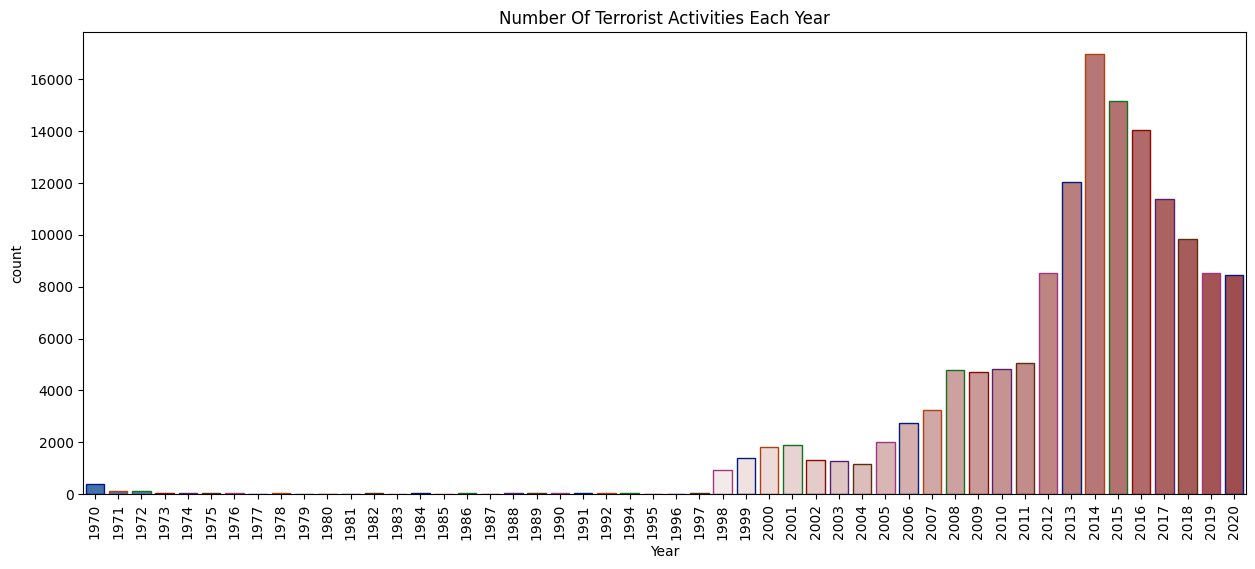

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', data=data, palette='vlag', edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

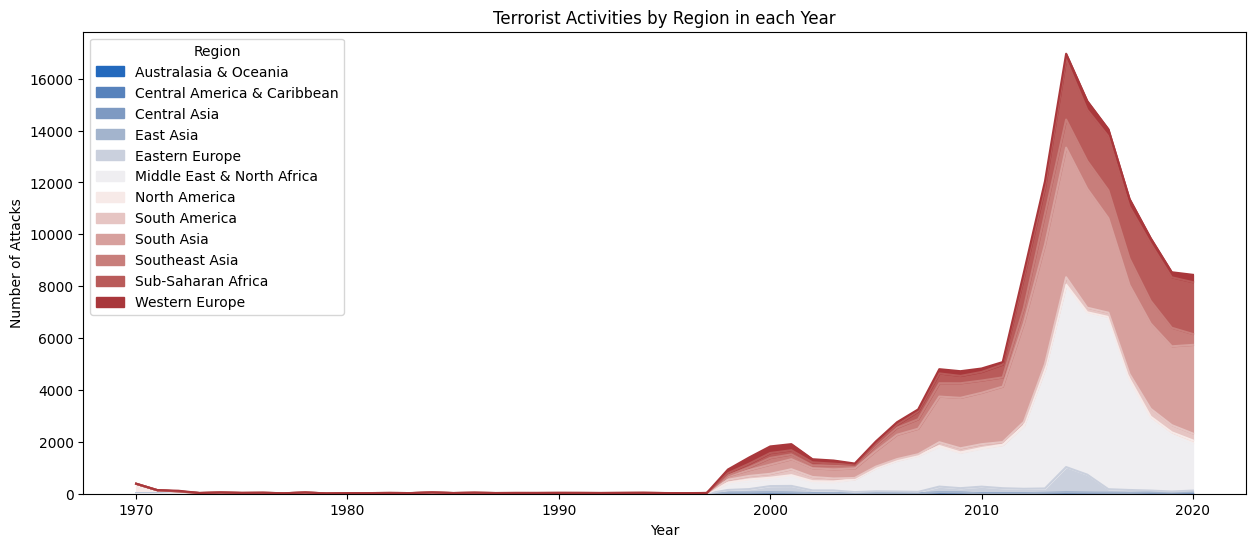

In [ ]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6),colormap="vlag")
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

<Axes: ylabel='Region'>

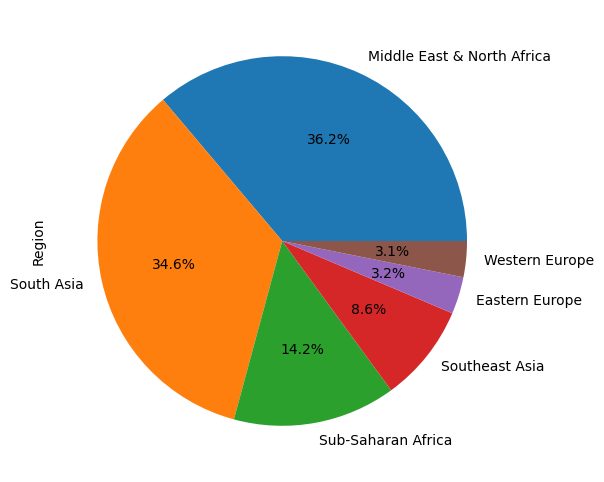

In [ ]:
top5_Region=data['Region'].value_counts()[:6]
top5_Region.plot(kind='pie',autopct="%1.1f%%",figsize=(7,6))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143586 entries, 5 to 209705
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 149.0+ MB
